In [1]:
import re

def extract_data(tex_file, color, output_csv):
    with open(tex_file, 'r') as file:
        content = file.read()

    # Regex pattern to match the data table
    pattern = rf'\\addplot\s+\[thick,\s+{color}\]\stable\s+\{{%\n(.+?)\}};'
    match = re.search(pattern, content, re.DOTALL)

    if match:
        data = match.group(1)
        with open(output_csv, 'w') as file:
            file.write('False Positive Rate,True Positive Rate\n')
            lines = data.strip().split('\n')
            for line in lines:
                x, y = line.split()
                file.write(f"{x},{y}\n")
    else:
        print(f"No data found for color {color}")

# Define colors and corresponding CSV filenames
colors = {
    'green!50.1960784313725!black': '/home/infres/abounhar/covert_semantics_cleaned/hypothesis_test/ROC_curve/csv/roc_curve_green.csv',
    'black': '/home/infres/abounhar/covert_semantics_cleaned/hypothesis_test/ROC_curve/csv/roc_curve_black.csv',
    'red': '/home/infres/abounhar/covert_semantics_cleaned/hypothesis_test/ROC_curve/csv/roc_curve_red.csv'
}

for color, csv_file in colors.items():
    extract_data('/home/infres/abounhar/covert_semantics_cleaned/hypothesis_test/ROC_curve/roc_curve_n_512.tex', color, csv_file)

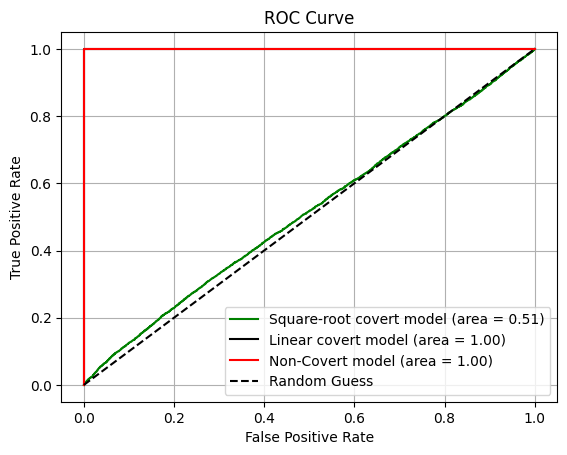

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_roc_curve(csv_file, color, label):
    data = pd.read_csv(csv_file)
    plt.plot(data['False Positive Rate'], data['True Positive Rate'], color=color, label=label)
    
def plot_diagonal():
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    
plt.figure()

# Plot each ROC curve
plot_roc_curve('/home/infres/abounhar/covert_semantics_cleaned/hypothesis_test/ROC_curve/csv/roc_curve_green.csv', 'green', 'Square-root covert model (area = 0.51)')
plot_roc_curve('/home/infres/abounhar/covert_semantics_cleaned/hypothesis_test/ROC_curve/csv/roc_curve_black.csv', 'black', 'Linear covert model (area = 1.00)')
plot_roc_curve('/home/infres/abounhar/covert_semantics_cleaned/hypothesis_test/ROC_curve/csv/roc_curve_red.csv', 'red', 'Non-Covert model (area = 1.00)')

# Plot diagonal line
plot_diagonal()

# Customize plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)

# Save the plot as SVG
plt.savefig('/home/infres/abounhar/covert_semantics_cleaned/hypothesis_test/ROC_curve/roc_curve.svg', format='svg')
plt.show()